### Data Visualization

By ADA Group 1

In this Jupyter Notebook, we will explore and visualize our data. Moreover, as we are using geographic referenced information, we will use Geopandas to plot choropleth maps with our data.

For Data Dictionary, please refer to the notebook 00_ReadMe.

### Import Packages

In [1]:
#Code must be executed in PUI2016_Python3 Kernel for executing Geopandas
import pandas as pd
import numpy as np
import geopandas as gp
import seaborn as sn
import datetime as dt
import pylab as pl
import urllib.request
from urllib.request import urlretrieve
import zipfile
#Visualization tools
import matplotlib as mplib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt # visualization package 1
import seaborn as sns           # visualization package 2
from mpl_toolkits import mplot3d
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Prepare and Explore the Data
* Based on Visuals developed for Assignment 5

In [2]:
#Import NYC Census Block level data on racial composition of the population
#Import Block ID as character to preserve full number
blocks = pd.read_csv("../Data/blocks_clean.csv", usecols=range(1,23), dtype= {'BLOCKID': str})
blocks.shape
#29,353 observations, 22 variables

(29353, 22)

In [3]:
# See what is available (notice we have some whitespaces here)
blocks.count()
#28376 blocks in total with 719 if them belonging to BIDs

BLOCKID         29353
Pop10           29353
Pop00           29353
shWhite00       29353
shLatino00      29353
shBlack00       29353
shAsian00       29353
shOther00       29353
pct_ch_white    29353
pct_ch_hisp     29353
pct_ch_black    29353
pct_ch_asian    29353
pct_ch_other    29353
pop_pct_ch      29353
BoroName        29353
NTACode         29353
NTAName         29353
A_poly          29353
bid_id            719
bid_name          719
a_weight        29353
BID_dummy       29353
dtype: int64

In [4]:
# Add BID string variable from BID dummy
blocks['BID_str'] = np.where(blocks.BID_dummy ==1, 'BID',
                           np.where(blocks.BID_dummy == 0,'Non-BID', ''))

blocks.head()

,BLOCKID,Pop10,Pop00,shWhite00,shLatino00,shBlack00,shAsian00,shOther00,pct_ch_white,pct_ch_hisp,...,pop_pct_ch,BoroName,NTACode,NTAName,A_poly,bid_id,bid_name,a_weight,BID_dummy,BID_str
0,360050300004003,249,272.0,58.088235,37.132353,1.102941,2.941176,0.735294,-17.525986,9.453992,...,91.544118,Bronx,BX10,Pelham Bay-Country Club-City Island,173964,NaN,NaN,1.0,0,Non-BID
1,360050409001001,11,1119.0,1.340483,9.562109,86.058981,0.983021,2.055407,-1.340483,-9.562109,...,0.983021,Bronx,BX43,Norwood,1387986,NaN,NaN,1.0,0,Non-BID
2,360050409002000,3223,1886.0,26.988335,9.809120,59.172853,1.855779,2.173913,-12.498729,1.422652,...,170.890774,Bronx,BX05,Bedford Park-Fordham North,833865,NaN,NaN,1.0,0,Non-BID
3,360050419001004,225,233.0,19.313305,60.944206,6.437768,11.587983,1.716738,-5.535527,-8.944206,...,96.566524,Bronx,BX43,Norwood,48578,NaN,NaN,1.0,0,Non-BID
4,360050449011006,28,28.0,71.428571,28.571429,0.000000,0.000000,0.000000,-3.571429,-7.142857,...,100.000000,Bronx,BX62,Woodlawn-Wakefield,49237,NaN,NaN,1.0,0,Non-BID


In [5]:
## Check the distribution of variable of interest (Change in Percentage of White Population)
print(blocks.pct_ch_white.describe())
print(blocks.pct_ch_white.median())
## Median change in share of white population -1.668%

count    29353.000000
mean        -3.640671
std         14.070816
min       -109.890110
25%         -9.285407
50%         -1.668042
75%          1.412524
max        100.000000
Name: pct_ch_white, dtype: float64
-1.66804209542


As can be seen above, both the median and mean change of the white population change between 2000 and 2010 are between -1.67 and -3.64. More white people are leaving their existing neighborhoods then coming in. How about if we break down by whether that census block group has a Business Improvement District or not.

As can be seen below, for this with Business Improve Districts, the white population change is positive while those without the Business Improve Districts, the white population change is negative. As such, this seems to correspond to some of our model hypothesis in BIDs being an influencer in gentrification. We will have to fit models to confirm that hypothesis.


In [6]:
## Let's take a look at the BIDs only
BIDs = blocks[blocks["BID_dummy"] == 1]
print(BIDs.pct_ch_white.describe())
## Median change in share of white population 0.24%

count    719.000000
mean       0.749792
std       18.598936
min     -100.000000
25%       -6.111328
50%        0.046853
75%        6.902316
max      100.000000
Name: pct_ch_white, dtype: float64


In [7]:
## Let's take a look at the NON BIDs only
BIDs = blocks[blocks["BID_dummy"] == 0]
print(BIDs.pct_ch_white.describe())
## Median change in share of white population -1.76%

count    28634.000000
mean        -3.750915
std         13.920813
min       -109.890110
25%         -9.366380
50%         -1.714092
75%          1.322168
max        100.000000
Name: pct_ch_white, dtype: float64


We also explore which borough has the most significant white population change. It looks like by our definition of gentification which corresponds to positive in white population in the neighborhood Brookly and Manhattan are facing some form of gentrification overall compared to the other boroughs. Of course, we will have to look at the census block level to actually determine which communities are gentrifying and which are not. This is more of an overall trend.

In [8]:
## Calculate mean change in pct of white population by borough
# All observations:
med_boro_all = blocks.groupby('BoroName')['pct_ch_white'].mean().reset_index()
med_boro_all.columns = ['BoroName','pct_ch_white']

## Print the result
print(med_boro_all)

        BoroName  pct_ch_white
0          Bronx     -4.614256
1       Brooklyn      0.057874
2      Manhattan      1.311878
3         Queens     -6.090370
4  Staten Island     -5.846996


### Histograms and Bar Charts

The histograms and bar charts explore the distribution of change in white population as described above.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


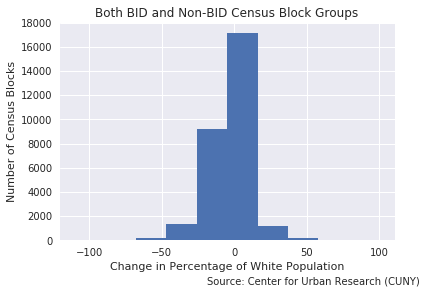

In [9]:
#Print a Histogram of change in racial composition
plt.hist(blocks.pct_ch_white)
plt.xlabel('Change in Percentage of White Population')
plt.ylabel('Number of Census Blocks')
plt.title('Both BID and Non-BID Census Block Groups')
plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(0.44,-0.2), xycoords="axes fraction")
plt.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


PermissionError: [Errno 13] Permission denied: '../Data/histogram_BID.pdf'

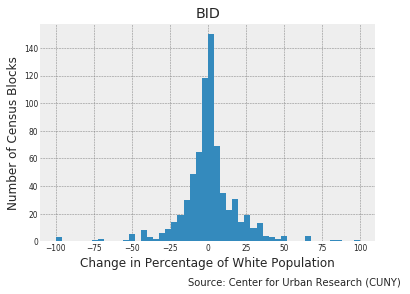

In [11]:
## Set Style
## Set the Background color (https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)
plt.style.use('bmh')
## Change axis and grid
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.xticks(fontsize=7.5)
plt.tick_params(axis='x', which='major', pad=2)
plt.yticks(fontsize=7.5)
plt.tick_params(axis='y', which='major', pad=2)

## Create one chart for BIDs and one for non-BIDs
for i in set(blocks["BID_str"]):
    tmp = blocks[blocks["BID_str"] == i]
    plt.hist(tmp["pct_ch_white"],bins=50)

    plt.xlabel('Change in Percentage of White Population')
    plt.ylabel('Number of Census Blocks')
    plt.title(str(i))
    
    plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(0.44,-0.2), xycoords="axes fraction")

    filename = "../Data/" + "histogram_" + str(i) + ".pdf"
    
    plt.savefig(filename ,bbox_inches='tight', dpi=200)
    plt.show()

### Scatterplot

We want to explore how percent change of share of white population from 2000-2010 is relatated to racial composition in 2000 at the block level.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


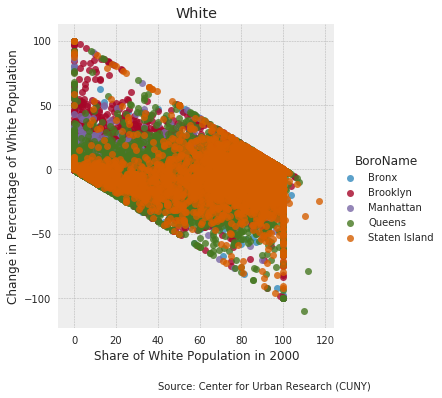

In [12]:
# Percentage of White Population in 2000.
sns.lmplot(x='shWhite00', y='pct_ch_white', data=blocks,
           fit_reg=False, # No regression line
           hue='BoroName')      # Color by Borough

plt.ylabel('Change in Percentage of White Population')
plt.xlabel('Share of White Population in 2000')
plt.title('White')

plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(0.36,-0.2), xycoords="axes fraction")

plt.savefig("../Data/1_scatter_White.pdf",bbox_inches='tight', dpi=200)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


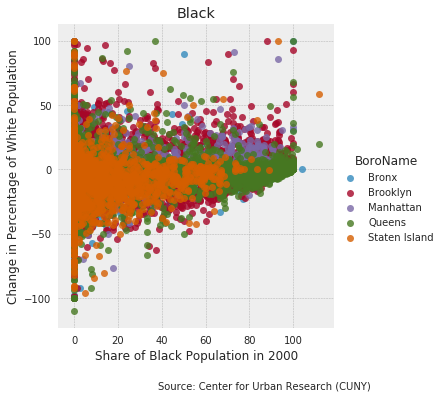

In [43]:
# Percentage of Black Population in 2000.
sns.lmplot(x='shBlack00', y='pct_ch_white', data=blocks,
           fit_reg=False, # No regression line
           hue='BoroName')      # Color by Borough

plt.ylabel('Change in Percentage of White Population')
plt.xlabel('Share of Black Population in 2000')
plt.title('Black')

plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(0.36,-0.2), xycoords="axes fraction")

plt.savefig("../Data/2_scatter_Black.pdf",bbox_inches='tight', dpi=200)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


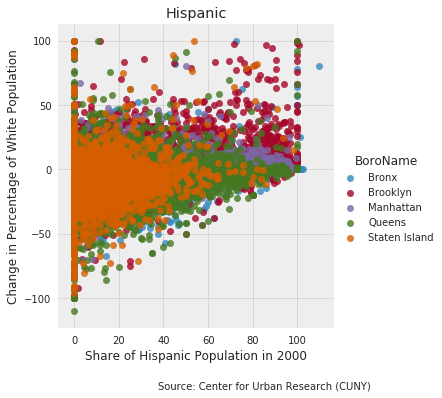

In [44]:
# Percentage of Hispanic Population in 2000.
sns.lmplot(x='shLatino00', y='pct_ch_white', data=blocks,
           fit_reg=False, # No regression line
           hue='BoroName') # Color by Borough

plt.ylabel('Change in Percentage of White Population')
plt.xlabel('Share of Hispanic Population in 2000')
plt.title('Hispanic')

plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(0.36,-0.2), xycoords="axes fraction")

plt.savefig("../Data/3_scatter_Hispanic.pdf",bbox_inches='tight', dpi=200)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


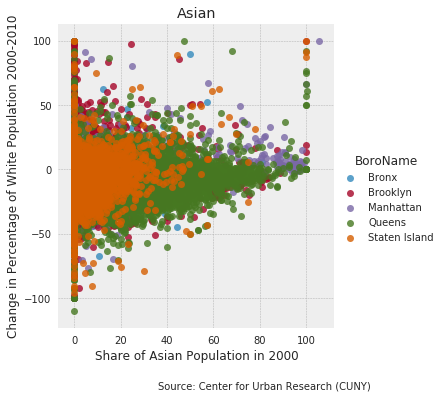

In [15]:
# Percentage of Asian Population in 2000.
sns.lmplot(x='shAsian00', y='pct_ch_white', data=blocks,
           fit_reg=False, # No regression line
           hue='BoroName')      # Color by evolution stage

plt.ylabel('Change in Percentage of White Population 2000-2010')
plt.xlabel('Share of Asian Population in 2000')
plt.title('Asian')

plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(0.36,-0.2), xycoords="axes fraction")

plt.savefig("../Data/4_scatter_Asian.pdf",bbox_inches='tight', dpi=200)

Graphs show:
* White population moved to neighborhoods with fewer White population and moved out from predominantly white neighborhoods. Points are grouped in a downward line shape.
* Predominantly Black neighborhood received white newcomers mostly in Brooklyn and Manhattan. Although points not  grouped in a defined shape.
* Predominantly Hispanic neighborhoods were the most displaced, especially in Brooklyn. Points are grouped in a upward line shape.
* Predominantly Asian neighborhoods recieved fewer White population than other races.


## Map Visualization

Map visualization code obtained from Juan Sokoloff, fellow classmate.

#### Import NYC choropleth package for ploting maps with geopandas

In [46]:
# Map visualization code obtained from Juan Sokoloff, fellow classmate.
## Retrieve NYC choropleth from profesor Federica Bianco
urllib.request.urlretrieve("https://raw.githubusercontent.com/fedhere/choroplethNYC/master/choroplethNYC.py","choroplethNYC.py")
import choroplethNYC as cp

#### Import Shapefile and Join to our Data

In [47]:
# Import Census Blocks shapefile as a geodataframe
# Obtained from CUNY Urban Research center
blocks = gp.GeoDataFrame.from_file("../Data/Blocks_shape/blocks_clip.shp")
blocks.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10', 'GEOID10',
       'NAME10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'BLOCKID10', 'STATE', 'COUNTY', 'TRACT', 'BLKGRP', 'BLOCK', 'CBSA',
       'P0020001', 'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006',
       'P0020007', 'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P2K20001',
       'P2K20002', 'P2K20003', 'P2K20004', 'P2K20005', 'P2K20006', 'P2K20007',
       'P2K20008', 'P2K20009', 'P2K20010', 'P2K20011', 'WHITE10', 'LATINO10',
       'BLACK10', 'ASIAN10', 'OTHERS10', 'PLURAL10', 'PLURALN10', 'TIE10',
       'WHITE00', 'LATINO00', 'BLACK00', 'ASIAN00', 'OTHERS00', 'PLURAL00',
       'PLURALN00', 'TIE00', 'CHGT0010', 'CHGW0010', 'CHGB0010', 'CHGA0010',
       'CHGH0010', 'CHGO0010', 'geometry'],
      dtype='object')

In [48]:
# Load the full datasets used in the logistic regression model
blocks_data = pd.read_csv("../Data/Blocks_full_dataset.csv", usecols=range(1,35), dtype= {'BLOCKID': str} )
blocks_data.shape

(29204, 34)

In [49]:
#See all the columns
blocks_data.columns

Index(['BLOCKID', 'shInc01_2002', 'shInc02_2002', 'shInc03_2002',
       'shEd01_2002', 'shEd02_2002', 'shEd03_2002', 'shEd04_2002',
       'shInc01_2010', 'shInc02_2010', 'shInc03_2010', 'shEd01_2010',
       'shEd02_2010', 'shEd03_2010', 'shEd04_2010', 'pct_ch_hInc',
       'pct_ch_hEduc', 'pct_ch_white', 'a_weight', 'bid_id', 'BID_dummy',
       'BoroName_Bronx', 'BoroName_Brooklyn', 'BoroName_Manhattan',
       'BoroName_Queens', 'shWhite00', 'shBlack00', 'shBlack00.1', 'shAsian00',
       'changesdummy', 'dist_sub_m', 'dist_sPark', 'dist_lPark',
       'PR_DWELLING_UNIT'],
      dtype='object')

In [50]:
blocks_data.head()

,BLOCKID,shInc01_2002,shInc02_2002,shInc03_2002,shEd01_2002,shEd02_2002,shEd03_2002,shEd04_2002,shInc01_2010,shInc02_2010,...,BoroName_Queens,shWhite00,shBlack00,shBlack00.1,shAsian00,changesdummy,dist_sub_m,dist_sPark,dist_lPark,PR_DWELLING_UNIT
0,360050001001000,41.504540,38.910506,38.910506,0.0,0.0,0.0,0.0,34.280118,47.012733,...,0.0,8.521221,60.605009,60.605009,0.260854,0,2990.620117,2112.219971,1333.260010,0
1,360050001001013,54.290718,35.026270,35.026270,0.0,0.0,0.0,0.0,27.397260,43.052838,...,0.0,8.487242,60.517723,60.517723,0.184505,0,2802.429932,1970.089966,1057.729981,0
2,360050002001000,19.206146,61.459667,61.459667,0.0,0.0,0.0,0.0,21.602160,49.504950,...,0.0,9.885932,26.235741,26.235741,3.041825,0,2024.540039,443.230011,297.609009,0
3,360050002001001,27.496382,44.862518,44.862518,0.0,0.0,0.0,0.0,20.332717,51.756007,...,0.0,7.853403,27.225131,27.225131,0.000000,0,2014.689941,477.950989,278.540008,0
4,360050002001002,30.552291,50.528790,50.528790,0.0,0.0,0.0,0.0,20.558003,73.421439,...,0.0,3.859649,24.561404,24.561404,0.000000,0,2007.910034,522.379028,240.309998,0


In [51]:
blocks_data['pct_ch_white'].head()

0   -2.151056
1    0.955168
2   -8.161794
3   -5.097498
4   -1.228070
Name: pct_ch_white, dtype: float64

In [23]:
blocks_data['pct_ch_white'] = blocks_data['pct_ch_white']

In [52]:
# merge the shaoefile with our clean dataset
blocks_full = pd.merge(blocks, blocks_data,  left_on = 'BLOCKID10', 
                                                    right_on = 'BLOCKID', how = 'left')


### Map 1: Percentage Change in White Population

In [25]:
blocks_full['pct_ch_white'].head()

0          NaN
1   -17.525986
2    -1.340483
3   -12.498729
4          NaN
Name: pct_ch_white, dtype: float64

In [26]:
blocks_full_white= blocks_full.dropna(subset=['pct_ch_white'])
blocks_full_white['pct_ch_white'].head()

1   -17.525986
2    -1.340483
3   -12.498729
6    -5.535527
7    -3.571429
Name: pct_ch_white, dtype: float64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


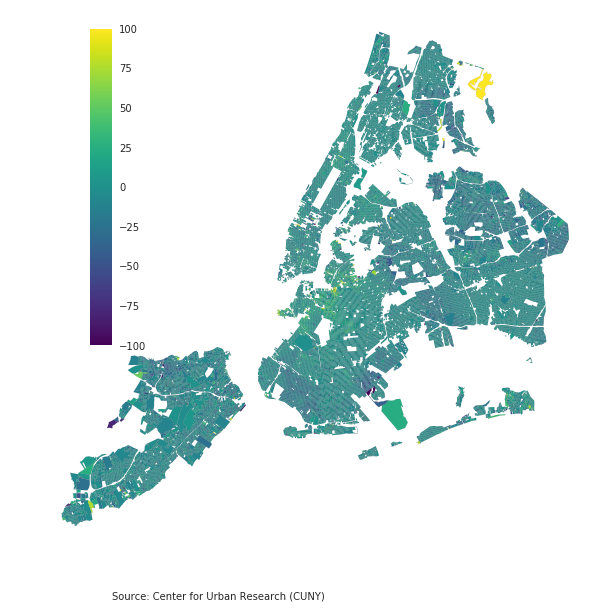

In [59]:
cp.choroplethNYC(blocks_full_white, column="pct_ch_white", color="k",cmap="viridis", edgecolor="k", lw=0.05);

plt.annotate('Source: Center for Urban Research (CUNY) ', xy=(1,-0.8), xycoords="axes fraction")
plt.savefig("../Data/1_map_chWhite.pdf",bbox_inches='tight', dpi=200)


* We can clearly identify areas with faster change in white population, in yellow.
* Northern Brooklyn concentrates most of the yellows.
* Neighborhoods as Williamsburg, Greenpoint, Crown Heights, Chelsea, Harlem and Long Island City.

### Map 2: Percentage Change in Highly Educated Workers


In [53]:
blocks_full['pct_ch_hEduc'].head()

0          NaN
1    46.556741
2    24.178212
3    31.713405
4          NaN
Name: pct_ch_hEduc, dtype: float64

In [54]:
blocks_full_hEd= blocks_full.dropna(subset=['pct_ch_hEduc'])
blocks_full_hEd['pct_ch_hEduc'].head()

1    46.556741
2    24.178212
3    31.713405
6    20.654045
7    37.037037
Name: pct_ch_hEduc, dtype: float64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


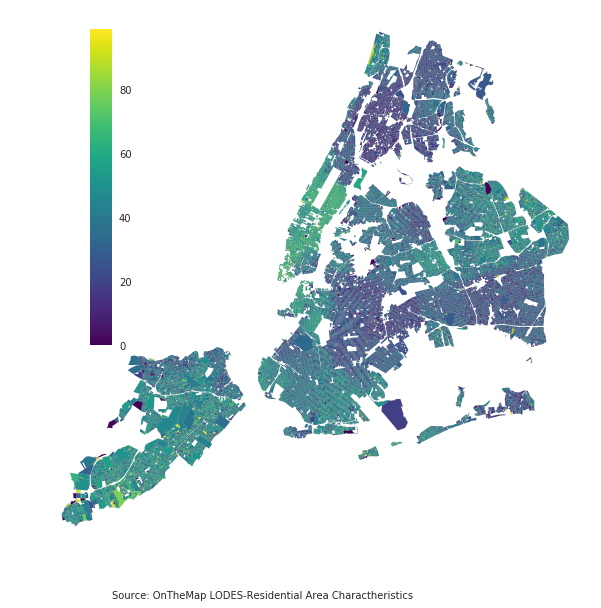

In [60]:
cp.choroplethNYC(blocks_full_hEd, column="pct_ch_hEduc", color="k",cmap="viridis", edgecolor="k", lw=0.05);
plt.annotate('Source: OnTheMap LODES-Residential Area Charactheristics', xy=(1,-0.8), xycoords="axes fraction")
plt.savefig("../Data/2_map_chHighEd.pdf",bbox_inches='tight', dpi=200)

### Map 3: Percentage Change in High Income Workers

In [56]:
blocks_full['pct_ch_hInc'].head()

0          NaN
1    23.375317
2    15.360449
3    14.509670
4          NaN
Name: pct_ch_hInc, dtype: float64

In [57]:
blocks_full_hInc= blocks_full.dropna(subset=['pct_ch_hInc'])
blocks_full_hInc['pct_ch_hInc'].head()

1    23.375317
2    15.360449
3    14.509670
6    -5.637773
7    15.194682
Name: pct_ch_hInc, dtype: float64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


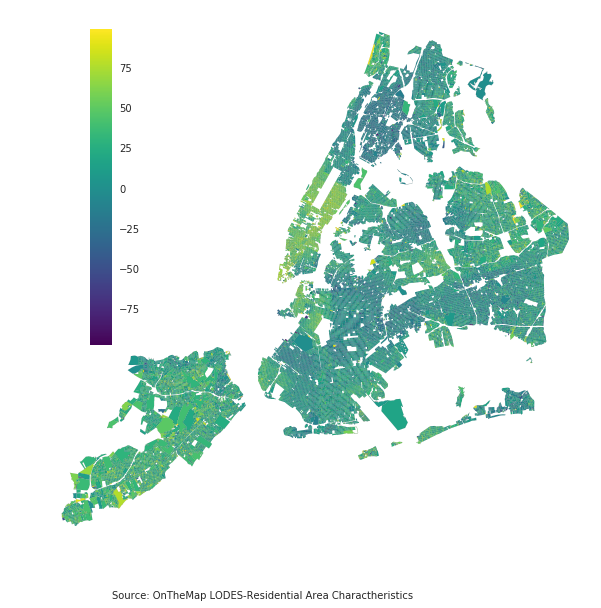

In [61]:
cp.choroplethNYC(blocks_full_hInc, column="pct_ch_hInc", color="k",cmap="viridis", edgecolor="k", lw=0.05);
plt.annotate('Source: OnTheMap LODES-Residential Area Charactheristics', xy=(1,-0.8), xycoords="axes fraction")
plt.savefig("../Data/3_map_chHighInc.pdf",bbox_inches='tight', dpi=200)

### Map 4: Number of New Units per Block
Plot only Blocks that have had new units authorized since 2012.

In [62]:
blocks_full['PR_DWELLING_UNIT'][blocks_full['PR_DWELLING_UNIT']==0] = np.nan

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
blocks_full_buildings= blocks_full.dropna(subset=['PR_DWELLING_UNIT'])

In [64]:
blocks_full_buildings['PR_DWELLING_UNIT'].describe()

count    10046.000000
mean       258.697691
std       1538.275404
min          1.000000
25%          2.000000
50%          4.000000
75%         20.000000
max      48898.000000
Name: PR_DWELLING_UNIT, dtype: float64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


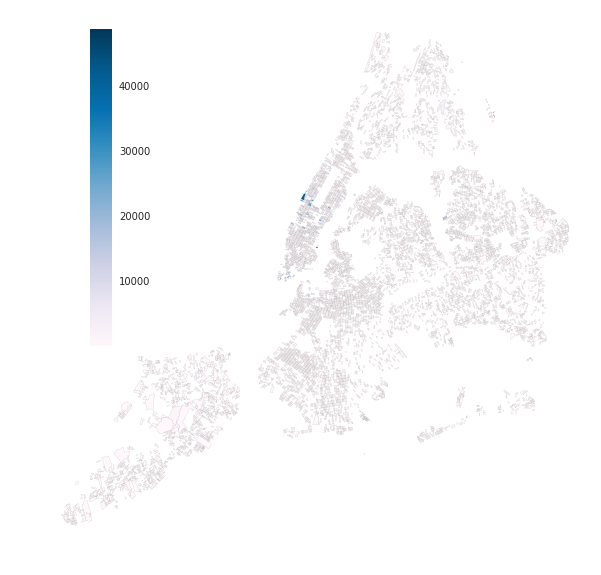

In [105]:
cp.choroplethNYC(blocks_full_buildings, column="PR_DWELLING_UNIT", cmap="PuBu",  color="k", edgecolor="k", lw=0.05);